In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from collections import Counter
from scipy.interpolate import interp1d

In [2]:
prior = pd.Series(1/101, index=np.linspace(0, 1, 101))
stocks = [prior.copy() for i in range(4)]

In [3]:
def update(ff, data):
    # Data can either be P (Profit) or L (loss)
    
    x = ff.index
    if data == "P":
        ff *= x
    else:
        ff *= 1-x
        
    ff /= ff.sum()

In [4]:
winning_prob = [0.15, 0.25, 0.35, 0.45]

In [5]:
# Counts how many times we traded each stock
counter = Counter()

# Returns with the probability
def simulate(p):
    return np.random.random() < p

# Trades a stock and return if it was a Proft (P) or Loss (L)
def trade(s):
    counter[s] += 1
    p = winning_prob[s]
    
    if simulate(p):
        return "P"
    else:
        return "L"

In [6]:
for i in range(15):
    outcome = trade(3)
    print(outcome, end=" ")

L L L L L P P L L L L P L P P 

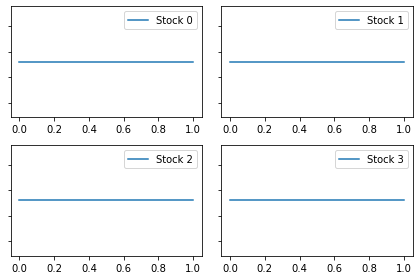

In [7]:
counter = Counter()

# We start out with an uniform aka uninformed distribution for all 4 stocks
def plot(stocks, xticklabels="invisible", yticklabels="invisible"):
    for j, k in enumerate(stocks):
        plt.subplot(2, 2, j+1)
        k.plot(label=f'Stock {j}')
        plt.gca().set_yticklabels([])
        plt.legend()
        
    plt.tight_layout()

plot(stocks)

In [8]:
# Calculate the Credible Interval
def c_interval(ff, probability):
    x = ff.index
    y = ff.cumsum()
    
    # Probs
    p = (1-probability)/2
    ps = [p, 1-p]
    
    # Interpolate
    interp = interp1d(y, x, fill_value=(x[0], x[-1]), 
                      assume_sorted=True, bounds_error=False)
    return interp(ps)

In [9]:
# Takes a random sample from the FF
def choice(ff):
    return np.random.choice(ff.index, p=ff)

# Takes a sample from each distribution
def draw(stocks):
    s = [choice(i) for i in stocks]
    return np.argmax(s)

# Choose a stock, do a trade, and update
def trading(stocks, verbose=False):
    i = draw(stocks)
    outcome = trade(i)
    update(stocks[i], outcome)
    
    if verbose:
        # Stock, outcome and mean
        print(i, outcome, np.sum(stocks[i].index * stocks[i]))

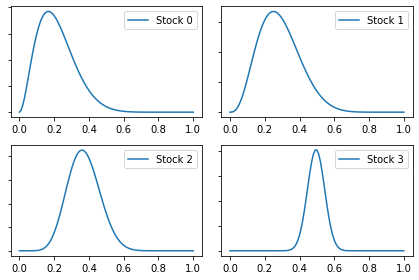

In [10]:
# Simulating the trades and updating the priors
for i in range(150):
    trading(stocks)
        
# Plotting the posteriors        
plot(stocks)

In [11]:
for i, count in sorted(counter.items()):
    print(i, count)

0 12
1 12
2 25
3 101


In [12]:
for i, j in enumerate(stocks):
    print(np.sum(j.index * j), c_interval(j, 0.9))

0.2142859387594895 [0.06104138 0.40519918]
0.28571421783779827 [0.10758363 0.48962261]
0.3703703703703719 [0.22071468 0.52117715]
0.4951456310679611 [0.40958043 0.57088275]
